# 5CS037 - Concepts and Technologies of AI.
Worksheet-2: Exploratory Data Analysis with Pandas -Part-1.

In [1]:
# code to mount google drive (access to datasets).
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1 - Data Read, Write and Inspect:  
Complete all following Task:  
• Dataset for the Task: "bank.csv"  
1. Load the provided dataset and import in pandas DataFrame.   

In [3]:
path_to_bank_file = '/content/drive/MyDrive/Concepts and Technologies of AI/W2_dataset/bank.csv'
bank_data = pd.read_csv(path_to_bank_file)

In [4]:
bank_data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [5]:
bank_data.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


2. Check info of the DataFrame and identify following:  
(a) columns with dtypes=object  
(b) unique values of those columns.  
(c) check for the total number of null values in each column.  


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
object_columns = bank_data.select_dtypes(['object'])
print(f'Following {len(object_columns.columns)} columns are of dtypes="object" : \n\n{object_columns.columns}')

Following 10 columns are of dtypes="object" : 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [8]:
print(f'Unique values of above mentioned object type columns are :\n')
for idx, col in enumerate(object_columns):
  print(f'{idx + 1}. {col} - {bank_data[col].unique()}')

Unique values of above mentioned object type columns are :

1. job - ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
2. marital - ['married' 'single' 'divorced']
3. education - ['tertiary' 'secondary' 'unknown' 'primary']
4. default - ['no' 'yes']
5. housing - ['yes' 'no']
6. loan - ['no' 'yes']
7. contact - ['unknown' 'cellular' 'telephone']
8. month - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
9. poutcome - ['unknown' 'failure' 'other' 'success']
10. y - ['no' 'yes']


In [9]:
print(f'Total amount of null in each column : \n{bank_data.isnull().sum()}')

Total amount of null in each column : 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ".csv" with name "banknumericdata.csv"

In [10]:
bank_data_not_objects = bank_data.select_dtypes(exclude=['object'])
bank_data_not_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [11]:
bank_data_not_objects.to_csv('/content/drive/MyDrive/Concepts and Technologies of AI/W2_dataset/banknumericdata.csv', index=False)
print('Successfully written to banknumericdata.csv')

Successfully written to banknumericdata.csv


4. Read ”banknumericdata.csv” and Find the summary statistics.

In [12]:
banknumericdata = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/W2_dataset/banknumericdata.csv')
banknumericdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


---
# Problem 2 - Data Imputations:
Complete all the following Task:  
• Dataset for the Task: "medical_student.csv"  
1. Load the provided dataset and import in pandas DataFrame.

In [74]:
medical_data_file_path = '/content/drive/MyDrive/Concepts and Technologies of AI/W2_dataset/medical_students_dataset.csv'
medical_data = pd.read_csv(medical_data_file_path)
medical_data.head(5)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [75]:
medical_data.tail(5)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No
199999,100000.0,20.0,Female,153.927409,99.928405,O,42.175189,98.595817,95.0,133.0,132.0,NaN,No


In [76]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [77]:
medical_data.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


2. Check info of the DataFrame and identify column with missing (null) values.

In [78]:
print(f'Total amount of null in each column : \n{medical_data.isnull().sum()}')

Total amount of null in each column : 
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


3. For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.

In [79]:
# Student Id is categorical and cannot be imputed as wished to dropping it
medical_data = medical_data.dropna(subset=['Student ID'])

# Age is range from 18 to 34, mean or median any is suitable
medical_data.loc[:, 'Age'] = medical_data['Age'].fillna(medical_data['Age'].median())

# Gender is categorical and cannot be imputed as wished to dropping it
medical_data = medical_data.dropna(subset=['Gender'])

# Height is numeric using mean for best expectation
medical_data.loc[:, 'Height'] = medical_data['Height'].fillna(medical_data['Height'].mean())

# Weight is numeric using mean for best expectation
medical_data.loc[:, 'Weight'] = medical_data['Weight'].fillna(medical_data['Weight'].mean())

# Blood Type is categorical and cannot be imputed as wished to dropping it
medical_data = medical_data.dropna(subset=['Blood Type'])

# BMI is filled with formula using data from Height and Weight column
medical_data.loc[:, 'BMI'] = medical_data['BMI'].fillna(medical_data['Weight'] / ((medical_data['Height'] / 100) ** 2))

# Temperature is numeric using mean for best expectation
medical_data.loc[:, 'Temperature'] = medical_data['Temperature'].fillna(medical_data['Temperature'].mean())

# Heart Rate is skewed by approximately 11.5 units (BPM), hence median is used
medical_data.loc[:, 'Heart Rate'] = medical_data['Heart Rate'].fillna(medical_data['Heart Rate'].median())

# Blood Pressure is skewed by approximately 14.4 units (mmHg), hence median is used
medical_data.loc[:, 'Blood Pressure'] = medical_data['Blood Pressure'].fillna(medical_data['Blood Pressure'].median())

# Cholesterol is highly skewed by approximately 37.5 units (mg/dL), hence median is used
medical_data.loc[:, 'Cholesterol'] = medical_data['Cholesterol'].fillna(medical_data['Cholesterol'].median())

# Diabetes is categorical and cannot be imputed as wished to dropping it
medical_data = medical_data.dropna(subset=['Diabetes'])

# Smoking is categorical and cannot be imputed as wished to dropping it
medical_data = medical_data.dropna(subset=['Smoking'])

In [80]:
medical_data.head(5)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,2.0,26.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
4,5.0,23.0,Female,174.934363,46.234173,O,15.108204,98.480008,95.0,115.0,231.0,No,No
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
8,9.0,21.0,Male,155.039678,42.958703,B,17.871682,98.808053,79.0,111.0,243.0,No,No


In [81]:
medical_data.tail(5)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
199986,99987.0,34.0,Male,165.651315,93.099756,A,33.928040,97.862209,62.0,100.0,205.0,No,No
199991,99992.0,28.0,Male,183.499177,69.957765,A,26.527962,97.321680,70.0,113.0,140.0,No,No
199992,99993.0,34.0,Male,161.590030,90.877589,B,34.803881,98.728836,70.0,96.0,208.0,No,No
199993,99994.0,22.0,Male,174.934363,46.155224,A,15.082405,98.331019,93.0,100.0,184.0,Yes,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [82]:
print(f'After filling, total amount of null in each column : \n{medical_data.isnull().sum()}')

After filling, total amount of null in each column : 
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.  
{Hint: dataset.duplicated.sum()}

In [83]:
duplicates = medical_data.duplicated(['BMI','Temperature','Heart Rate','Blood Pressure','Cholesterol'])
print(f'Duplicate values in dataset : {duplicates.sum()}')
print(medical_data[duplicates])

Duplicate values in dataset : 14546
        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
100001         2.0  34.0    Male  152.069157  47.630941          B  20.597139   
100007         8.0  28.0    Male  186.489402  52.389752         AB  15.063921   
100011        12.0  34.0  Female  182.416302  76.371050         AB  22.950992   
100022        23.0  29.0  Female  179.909041  90.679436         AB  28.015787   
100023        24.0  18.0    Male  174.934363  52.521560         AB  13.570402   
...            ...   ...     ...         ...        ...        ...        ...   
199972     99973.0  34.0    Male  174.934363  80.188752         AB  21.270517   
199973     99974.0  25.0  Female  156.297842  90.690186          B  37.123963   
199982     99983.0  21.0  Female  171.770897  69.957765          O  31.855816   
199985     99986.0  23.0  Female  162.884951  82.485778          B  31.089745   
199986     99987.0  34.0    Male  165.651315  93.099756          A  33.92

In [84]:
unique_medical_dataset = medical_data.drop_duplicates(['BMI','Temperature','Heart Rate','Blood Pressure','Cholesterol'])
new_duplicates = unique_medical_dataset.duplicated(['BMI','Temperature','Heart Rate','Blood Pressure','Cholesterol'])
print(f'Duplicate values in dataset : {new_duplicates.sum()}')
print(f'Medical Data with only unique data of BMI, Temperature, Heart Rate, Blood Pressure, Cholesterol : \n{unique_medical_dataset.loc[100000:100005]}')

Duplicate values in dataset : 0
Medical Data with only unique data of BMI, Temperature, Heart Rate, Blood Pressure, Cholesterol : 
        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
100003         4.0  30.0    Male  182.112867  63.332207          B  19.096042   
100004         5.0  23.0  Female  179.339293  46.234173          O  14.375143   
100005         6.0  32.0  Female  174.934363  69.957765          B  29.912403   

        Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
100003    98.839605        99.0           112.0        141.0       No     Yes  
100004    98.480008        95.0           139.0        231.0       No      No  
100005    99.668373        70.0           128.0        183.0       No     Yes  


---
# 3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
**Dataset Used: "titanic.csv"**

In [85]:
titanic_file_path = '/content/drive/MyDrive/Concepts and Technologies of AI/W2_dataset/Titanic-Dataset.csv'
titanic_data = pd.read_csv(titanic_file_path)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
titanic_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [87]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Problem - 1:**
Create a DataFrame that is subsetted for the columns "Name", "Pclass",  "Sex", "Age", "Fare", and "Survived".  
Retain only those rows where "Pclass" is equal to 1, representing first-class passengers.  
What is the mean, median, maximum value, and minimum value of the "Fare" column?

In [89]:
titanic_sub_dataset = titanic_data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

In [90]:
titanic_sub_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [91]:
titanic_1st_class_dataset = titanic_sub_dataset[titanic_sub_dataset['Pclass'] == 1]
titanic_1st_class_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 1 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      216 non-null    object 
 1   Pclass    216 non-null    int64  
 2   Sex       216 non-null    object 
 3   Age       186 non-null    float64
 4   Fare      216 non-null    float64
 5   Survived  216 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 11.8+ KB


In [92]:
fare_stats = titanic_1st_class_dataset['Fare'].describe()
print(f'Mean of Fare : {fare_stats["mean"]}')
print(f'Median of Fare : {fare_stats["50%"]}')
print(f'Maximum of Fare : {fare_stats["max"]}')
print(f'Minimum of Fare : {fare_stats["min"]}')

Mean of Fare : 84.1546875
Median of Fare : 60.287499999999994
Maximum of Fare : 512.3292
Minimum of Fare : 0.0


---
# **Problem - 2:**  
How many null values are contained in the "Age" column in your subsetted DataFrame? Once you've found this out, drop them from your DataFrame.  


In [93]:
print(f"Total null values in Age column : {titanic_data['Age'].isnull().sum()}")

Total null values in Age column : 177


In [94]:
titanic_data_age_null_cleared = titanic_data.dropna(subset=['Age'])
print(f"After dropping, total null values in Age column : {titanic_data_age_null_cleared['Age'].isnull().sum()}")

After dropping, total null values in Age column : 0


---
# **Problem - 3:**  

The "Embarked" column in the Titanic dataset contains categorical data representing the ports of embarkation:  

• "C" for Cherbourg  
• "Q" for Queenstown  
• "S" for Southampton  

**Task:**
1. Use one-hot encoding to convert the "Embarked" column into separate binary columns ("Embarked C", "Embarked Q", "Embarked S").    

In [95]:
one_hot_encoded_data = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Embarked_C  891 non-null    bool 
 1   Embarked_Q  891 non-null    bool 
 2   Embarked_S  891 non-null    bool 
dtypes: bool(3)
memory usage: 2.7 KB


In [96]:
one_hot_encoded_data.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True


2. Add these new columns to the original DataFrame.

In [97]:
titanic_encoded_data = pd.concat([titanic_data_age_null_cleared, one_hot_encoded_data], axis=1)
titanic_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    float64
 1   Survived     714 non-null    float64
 2   Pclass       714 non-null    float64
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    float64
 7   Parch        714 non-null    float64
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
 12  Embarked_C   891 non-null    bool   
 13  Embarked_Q   891 non-null    bool   
 14  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(7), object(5)
memory usage: 93.1+ KB


3. Drop the original "Embarked" column.

In [98]:
titanic_cleaned_dataset = titanic_encoded_data.drop(columns=['Embarked'])
titanic_cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 888
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    float64
 1   Survived     714 non-null    float64
 2   Pclass       714 non-null    float64
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    float64
 7   Parch        714 non-null    float64
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(7), object(4)
memory usage: 86.1+ KB


4. Print the first few rows of the modified DataFrame to verify the changes.

In [99]:
titanic_cleaned_dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,False,False,True
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,True,False,False
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,False,False,True
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,False,False,True


---
# Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.  

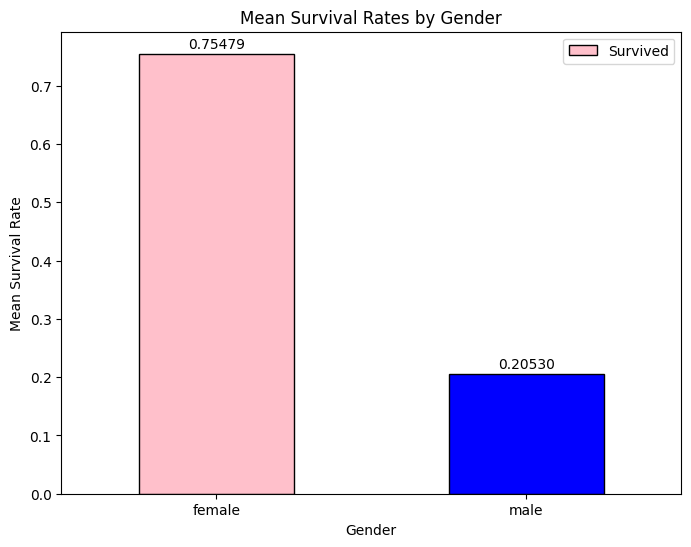

In [100]:
gender_mean_survival_rates = titanic_cleaned_dataset.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(8, 6))
bar_colors = ['pink', 'blue']
bars = gender_mean_survival_rates.plot(kind='bar', color=bar_colors, edgecolor='black')

plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rates by Gender')
plt.xticks(rotation=0)

for idx, value in enumerate(gender_mean_survival_rates):
  plt.text(idx, value + 0.01, f'{value:.5f}', ha='center', fontsize=10, color='black')

plt.legend()
plt.show()

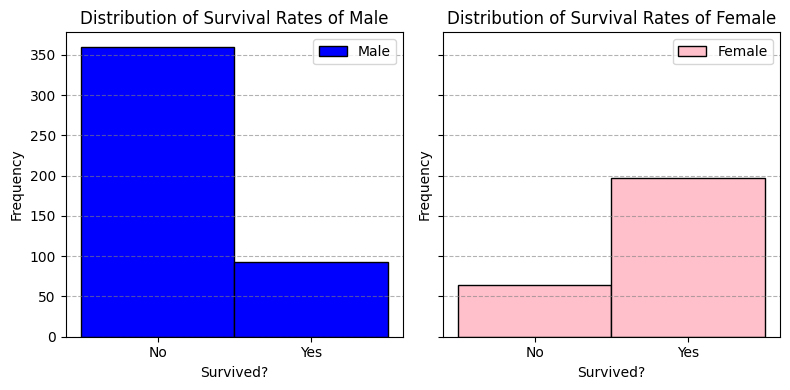

In [101]:
male_survived = titanic_cleaned_dataset[titanic_cleaned_dataset['Sex'] == 'male']['Survived']
female_survived = titanic_cleaned_dataset[titanic_cleaned_dataset['Sex'] == 'female']['Survived']

fig, axes = plt.subplots(1,2, figsize=(8, 4), sharey=True)
axes[0].hist(male_survived, bins=[-0.5, 0.5, 1.5], color='blue', edgecolor='black', label='Male')
axes[1].hist(female_survived, bins=[-0.5, 0.5, 1.5], color='pink', edgecolor='black', label='Female')
axes[0].set_xticks([0,1])
axes[1].set_xticks([0,1])
axes[0].set_xticklabels(['No','Yes'])
axes[1].set_xticklabels(['No','Yes'])
axes[0].set_xlabel('Survived?')
axes[1].set_xlabel('Survived?')
axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')
axes[0].set_title('Distribution of Survival Rates of Male')
axes[1].set_title('Distribution of Survival Rates of Female')
axes[0].grid(axis='y',linestyle='--',color='gray',alpha=0.6)
axes[1].grid(axis='y',linestyle='--',color='gray',alpha=0.6)
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()

---
# **Problem - 5:**

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation ("Embarked"). In this instance, compare the ports "C" (Cherbourg), "Q" (Queenstown), and "S" (Southampton).

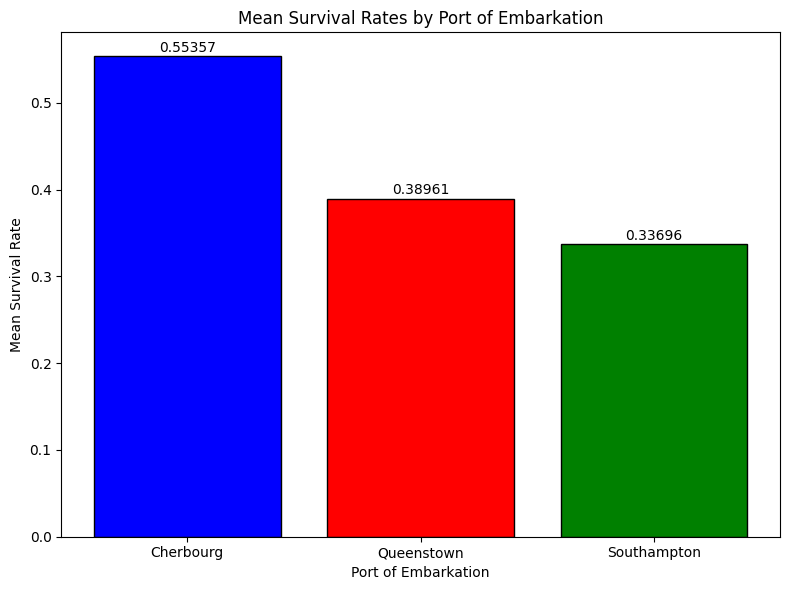

In [102]:
titanic_dataset = pd.read_csv(titanic_file_path)
embarked_survival_rates = titanic_dataset.groupby('Embarked')['Survived'].mean()

ports = ['Cherbourg','Queenstown','Southampton']
plt.figure(figsize=(8, 6))
plt.bar(ports, embarked_survival_rates, color=['blue', 'red', 'green'], edgecolor='black')

for idx, value in enumerate(embarked_survival_rates):
  plt.text(idx, value + 0.005, f'{value:.5f}', ha='center', fontsize=10, color='black')

plt.xlabel('Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rates by Port of Embarkation')
plt.tight_layout()
plt.show()

---
# **Problem - 6** {Optional}:
Show how the survival rates ('Survived') vary by age group and passenger class ('Pclass'). Break up the 'Age' column into five quantiles in your DataFrame, and then compare the means of 'Survived' by class and age group. Draw a visualization using a any plotting library to represent this graphically.

<Figure size 1000x600 with 0 Axes>

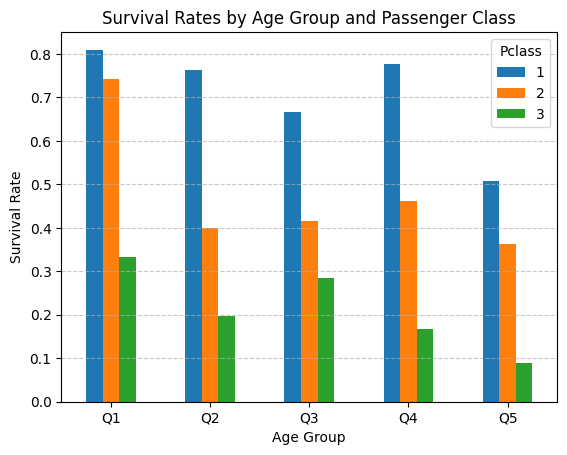

In [103]:
titanic_data = pd.read_csv(titanic_file_path)

titanic_data['Age_group'] = pd.qcut(titanic_data['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

survival_by_class_age = titanic_data.groupby(['Pclass', 'Age_group'], observed=False)['Survived'].mean().reset_index()

pivot_data = survival_by_class_age.pivot(index='Age_group', columns='Pclass', values='Survived')

plt.figure(figsize=(10,6))
pivot_data.plot(kind='bar')
plt.title('Survival Rates by Age Group and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Pclass')
plt.show()

---